In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

서로 다른 폴더에 있는 모듈들을 import하기 위해 절대경로를 sys.path에 추가해준다

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import torch

In [7]:
model=YOLO('ultralytics/models/v8/yolov8s.yaml')
model=YOLO('weight/yolov8/s_best.pt')



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256


image 1/1 /home/joowan/Desktop/face_pr/crowd_people.png: 416x640 60 faces, 3.4ms
Speed: 0.1ms preprocess, 3.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


60


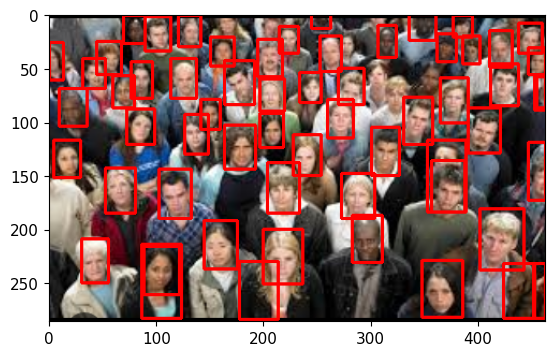

In [8]:

result=model(source='crowd_people.png')
orig_img=result[0].orig_img
img=Image.fromarray(orig_img)
numpy_img=np.array(img)
opencv_img=cv2.cvtColor(numpy_img,cv2.COLOR_BGR2RGB)
boxes=result[0].boxes.xyxy.cpu().numpy()
for box in boxes:
    x1=int(box[0])
    y1=int(box[1])
    x2=int(box[2])
    y2=int(box[3])
    cv2.rectangle(opencv_img,(x1,y1),(x2,y2),(255,0,0),2)


print(len(boxes))
plt.imshow(opencv_img)
plt.show()
